<a href="https://colab.research.google.com/github/nat-20/TrabajoFinal/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL

*Tratamiento de Señales III*

*Facultad de Ingeniería*

*Universidad de Antioquia*

*Prof. Hernán Felipe García*

*Alejandra Zuleta Gónzalez, Santiago Patiño Guerrero y Natalia Pérez Puentes*

*2021-2*


Utilizaremos la base de datos [CIC-IDS2017](https://www.unb.ca/cic/datasets/ids-2017.html)


---



Los sistemas de detección de intrusiones (IDS) y los sistemas de prevención de intrusiones (IPS) son las herramientas de defensa más importantes contra los sofisticados y crecientes ataques a la red. Debido a la falta de conjuntos de datos de prueba y validación fiables, los enfoques de detección de intrusiones basados en anomalías sufren evoluciones de rendimiento consistentes y precisas.

Las evaluaciones de los once conjuntos de datos existentes desde 1998 en el instituto de ciberseguridad de canadá muestran que la mayoría están desfasados y son poco fiables. Algunos de estos conjuntos de datos adolecen de falta de diversidad y volumen de tráfico, otros no cubren la variedad de ataques conocidos, mientras que otros anonimizan los datos de carga útil de los paquetes, lo que no puede reflejar las tendencias actuales. Algunos también carecen de un conjunto de características y metadatos.

El conjunto de datos CICIDS2017 contiene los ataques benignos y los ataques comunes más actuales, que se asemejan a los verdaderos datos del mundo real (PCAPs). La generación de un tráfico de fondo realista fue la principal prioridad a la hora de crear este conjunto de datos. Se utilizó un sistema B-Profile (Sharafaldin, et al. 2016) para perfilar el comportamiento abstracto de las interacciones humanas y genera tráfico de fondo benigno naturalista. Para este conjunto de datos, se construyó el comportamiento abstracto de 25 usuarios basado en los protocolos HTTP, HTTPS, FTP, SSH y correo electrónico.

El periodo de captura de datos comenzó a las 9 de la mañana del lunes 3 de julio de 2017 y finalizó a las 17 horas del viernes 7 de julio de 2017, para un total de 5 días. El lunes es el día normal y solo incluye el tráfico benigno. Los ataques ejecutados incluyen Fuerza Bruta FTP, Fuerza Bruta SSH, DoS, Heartbleed, Ataque Web, Infiltración, Botnet y DDoS. Se han ejecutado tanto por la mañana como por la tarde del martes, miércoles, jueves y viernes.


Cabe Aclarar que la página de la Universidad de Ciberseguridad de Canadá cuenta con una base de datos para aplicaciones de inteligencia computacional, donde las variables categóricas son removidas. Dicha base de datos es la que se importa a continuación:

In [1]:
%%capture
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13LV4QnTtI21tmp6pg5ZHJEBFxulq3aRj' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13LV4QnTtI21tmp6pg5ZHJEBFxulq3aRj" -O monday.csv && rm -rf /tmp/cookies.txt 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13VRs5fj-QoP2sbZE8X7Maes6lwxf_3K2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13VRs5fj-QoP2sbZE8X7Maes6lwxf_3K2" -O tuesday.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13OIvjFVRM59tBnKgWe-dFmTihXAnk5aJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13OIvjFVRM59tBnKgWe-dFmTihXAnk5aJ" -O wednesday.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13GUcNrwBk_AnZUc3iZBav3ozMy25pfRh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13GUcNrwBk_AnZUc3iZBav3ozMy25pfRh" -O thursday_morning.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13CIJP9Jf3PDQ0vyfwQgALZd3YyoL6vlu' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13CIJP9Jf3PDQ0vyfwQgALZd3YyoL6vlu" -O thursday_afternoon.csv && rm -rf /tmp/cookies.txt 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13SRgNHXw7UJmiQLJjov7xupWuDw4VFix' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13SRgNHXw7UJmiQLJjov7xupWuDw4VFix" -O friday_morning.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13EEFceZOCkCEVBud6eHOQ4Yr2_uVdOR2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13EEFceZOCkCEVBud6eHOQ4Yr2_uVdOR2" -O friday_afternoon_1.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13NUaGG1su72XNHZ3IXka80uWHbPnx28U' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13NUaGG1su72XNHZ3IXka80uWHbPnx28U" -O friday_afternoon_2.csv && rm -rf /tmp/cookies.txt

In [2]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sn

In [3]:
df_monday=pd.read_csv("monday.csv")
df_tuesday=pd.read_csv("tuesday.csv")
df_wednesday=pd.read_csv("wednesday.csv")
df_thursday_morning=pd.read_csv("thursday_morning.csv")
df_thursday_afternoon=pd.read_csv("thursday_afternoon.csv")
df_friday_morning=pd.read_csv("friday_morning.csv")
df_friday_afternoon_1=pd.read_csv("friday_afternoon_1.csv")
df_friday_afternoon_2=pd.read_csv("friday_afternoon_2.csv")

In [4]:
df_attack = df_monday.append(df_tuesday, ignore_index=True)
df_attack = df_attack.append(df_wednesday, ignore_index=True)
df_attack = df_attack.append(df_thursday_morning, ignore_index=True)
df_attack = df_attack.append(df_thursday_afternoon, ignore_index=True)
df_attack = df_attack.append(df_friday_morning, ignore_index=True)
df_attack = df_attack.append(df_friday_afternoon_1, ignore_index=True)
df_attack = df_attack.append(df_friday_afternoon_2, ignore_index=True)

In [5]:
df_attack.iloc[:,-1].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

De la ejecución de la anterior celda se puede evidenciar que la base de datos está bastante desbalanceada, pero este es el comportamiento que se tiene en la vida real.

In [9]:
y_new = df_attack.iloc[:,-1]
y_new[np.where(df_attack.iloc[:,-1] != 'BENIGN')[0]] = 'Attack'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
X = df_attack.iloc[:,:78]
X = X.values
y = y_new.values

X = X[~np.isnan(X).any(axis=1), :]
y = y[np.where(~np.isnan(X).any(axis=1)==True)[0]]
X = X[~np.isinf(X).any(axis=1), :]
y = y[np.where(~np.isinf(X).any(axis=1)==True)[0]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = y.reshape(-1,1)

print(X.shape)
print(y.shape)

(2827876, 78)
(2827876, 1)


Se decide utilizar el 70% de los datos para entrenamiento y el 30% de los datos para prueba.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2 Clases: 'BENIGN' and 'Attack'

Inicialmente se realiza una clasificación binaria para detectar si hay o no ataques. Para esto se utiliza el MLPClassifier y el RandomForestClassifier **con y sin PCA**.

El [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), es un clasificador Perceptron multicapa. Este modelo optimiza la función de pérdida utilizando LBFGS o descenso de gradiente estocástico.

Por otra parte, el [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) es un metaestimador que ajusta una serie de clasificadores de árboles de decisión en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

In [12]:
from sklearn.neural_network import MLPClassifier

In [14]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [15]:
print('Model Score:', clf.score(X_test, y_test))

Model Score: 0.9273141332189169


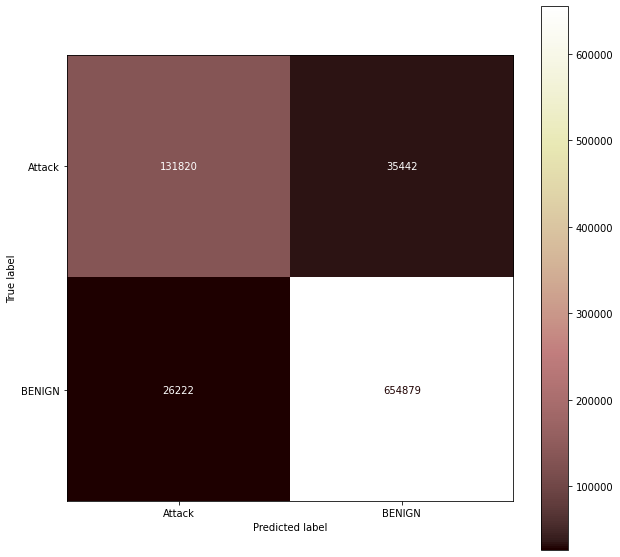

In [16]:
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='pink')
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)
y_pred_ran = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [13]:
print('Model Score: ', model.score(X_test, y_test))

Model Score:  0.9396378672808692


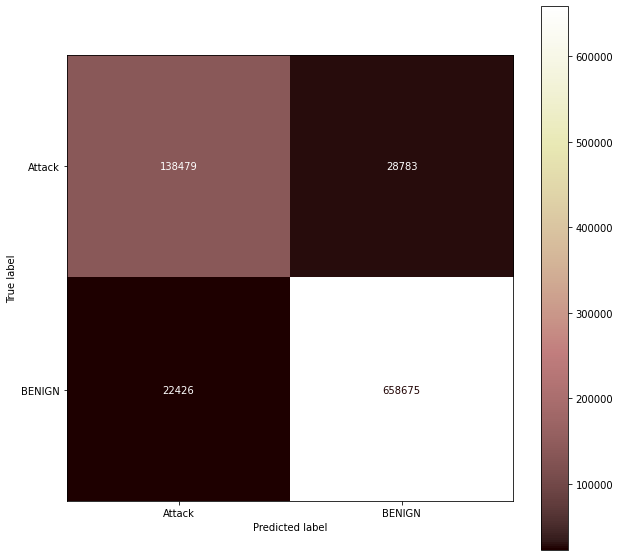

In [14]:
cm = confusion_matrix(y_test, y_pred_ran)
cmp = ConfusionMatrixDisplay(cm,display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='pink')
plt.show()

### Observaciones
El score obtenido es 92.73% y 93.9% para el MLP y el RandomForest respectivamente. Cabe aclarar que por el volumen de datos las simulaciones se demoraban mucho, por esto se dejaba entrenar el sistema alrededor de 20 minutos y el score y la matriz de confusión se sacaban con base al mejor modelo que el sistema obtuvo en este tiempo. Sin embargo, los resultados obtenidos son buenos a pesar del desbalance de la base de datos y que el no se llega al mejor modelo, por lo que se podrían mejorar estos resultados. 

A continuación se aplica PCA y se vuelve a implementar el clasificador RandomForest, obteniendo lo siguiente:

In [ ]:
from sklearn.decomposition import KernelPCA, PCA

pca = PCA(n_components=int(20))
X_pca = pca.fit_transform(X) # Transformamos los datos al espacio latente

#kernel_pca = KernelPCA(n_components=20, kernel='sigmoid', gamma=2)
#X_pca = kernel_pca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_pca, y, test_size=0.3, random_state=42)
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5).fit(X_train_PCA, y_train_PCA)
y_pred_ran_PCA = model.predict(X_test_PCA)

In [ ]:
print('Model Score: ', model.score(X_test_PCA, y_test_PCA))

In [ ]:
cm = confusion_matrix(y_test_PCA, y_pred_ran_PCA)
cmp = ConfusionMatrixDisplay(cm,display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='pink')
plt.show()

### Observaciones

# Clasificación multiclase

A continuación se realiza una clasificación de las 15 clases utilizando una SVM, el randomForestClassifier y el MLPClassifier, en donde se aplica PCA para reducir la dimensionalidad de las variables puesto que se tienen 78 características. También dado el volumen de datos y las limitaciones de RAM de Colab, se opta por utilizar el 20% de los datos de cada una de las clases, para mantener la distribución inicial.

Una SVM o máquina de soporte vectorial funciona correlacionando datos a un espacio de características de grandes dimensiones de forma que los puntos de datos se puedan categorizar, incluso si los datos no se puedan separar linealmente de otro modo.

In [6]:
df_bening = df_attack.loc[df_attack[' Label'] == 'BENIGN']
df_Dos_Hulk = df_attack.loc[df_attack[' Label'] == 'DoS Hulk']
df_PortScan = df_attack.loc[df_attack[' Label'] == 'PortScan']
df_DDoS = df_attack.loc[df_attack[' Label'] == 'DDoS']
df_DoS_GoldenEye = df_attack.loc[df_attack[' Label'] == 'DoS GoldenEye']
df_FTP_Patator = df_attack.loc[df_attack[' Label'] == 'FTP-Patator']
df_SSH_Patator = df_attack.loc[df_attack[' Label'] == 'SSH-Patator']
df_DoS_slowloris = df_attack.loc[df_attack[' Label'] == 'DoS slowloris']
df_DoS_Slowhttptest = df_attack.loc[df_attack[' Label'] == 'DoS Slowhttptest']
df_Web_Attack_Brute_Force = df_attack.loc[df_attack[' Label'] == 'Web Attack � Brute Force']
df_Bot = df_attack.loc[df_attack[' Label'] == 'Bot']
df_Web_Attack_XSS  = df_attack.loc[df_attack[' Label'] == 'Web Attack � XSS']
df_Infiltration = df_attack.loc[df_attack[' Label'] == 'Infiltration']
df_Web_Attack_Sql_Injection = df_attack.loc[df_attack[' Label'] == 'Web Attack � Sql Injection']
df_Heartbleed = df_attack.loc[df_attack[' Label'] == 'Heartbleed']

In [7]:
df_new = df_bening.sample(n=int(np.round(df_bening.shape[0]*0.2)),random_state=42)
df_new = df_new.append(df_Dos_Hulk.sample(n=int(np.round(df_Dos_Hulk.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_PortScan.sample(n=int(np.round(df_PortScan.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_DDoS.sample(n=int(np.round(df_DDoS.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_DoS_GoldenEye.sample(n=int(np.round(df_DoS_GoldenEye.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_FTP_Patator.sample(n=int(np.round(df_FTP_Patator.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_SSH_Patator.sample(n=int(np.round(df_SSH_Patator.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_DoS_slowloris.sample(n=int(np.round(df_DoS_slowloris.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_DoS_Slowhttptest.sample(n=int(np.round(df_DoS_Slowhttptest.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_Web_Attack_Brute_Force.sample(n=int(np.round(df_Web_Attack_Brute_Force.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_Bot.sample(n=int(np.round(df_Bot.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_Web_Attack_XSS.sample(n=int(np.round(df_Web_Attack_XSS.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_Infiltration.sample(n=int(np.round(df_Infiltration.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_Web_Attack_Sql_Injection.sample(n=int(np.round(df_Web_Attack_Sql_Injection.shape[0]*0.2)),random_state=42),ignore_index=True)
df_new = df_new.append(df_Heartbleed.sample(n=int(np.round(df_Heartbleed.shape[0]*0.2)),random_state=42),ignore_index=True)

In [ ]:
df_new.shape

(566147, 79)

In [ ]:
print(len(df_new.iloc[:,-1].value_counts()))
df_new.iloc[:,-1].value_counts()

15


BENIGN                        454619
DoS Hulk                       46215
PortScan                       31786
DDoS                           25605
DoS GoldenEye                   2059
FTP-Patator                     1588
SSH-Patator                     1179
DoS slowloris                   1159
DoS Slowhttptest                1100
Bot                              393
Web Attack � Brute Force         301
Web Attack � XSS                 130
Infiltration                       7
Web Attack � Sql Injection         4
Heartbleed                         2
Name:  Label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_attack.iloc[:,:78]
y = df_attack.iloc[:,-1]
X = X.values
y = y.values

X = X[~np.isnan(X).any(axis=1), :]
y = y[np.where(~np.isnan(X).any(axis=1)==True)[0]]
X = X[~np.isinf(X).any(axis=1), :]
y = y[np.where(~np.isinf(X).any(axis=1)==True)[0]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = y.reshape(-1,1)

print(X.shape)
print(y.shape)

(565578, 78)
(565578, 1)


In [ ]:
from sklearn.decomposition import KernelPCA, PCA

pca = PCA(n_components=int(20))
X_pca = pca.fit_transform(X) # Transformamos los datos al espacio latente

#kernel_pca = KernelPCA(n_components=20, kernel='sigmoid', gamma=2)
#X_pca = kernel_pca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

#X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_pca, y, test_size=0.3, random_state=42)
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))

original shape:    (565578, 78)
transformed shape: (565578, 20)


In [ ]:
modelSVM = svm.SVC(C = 10, kernel = 'rbf')
modelSVM.fit(X_train,y_train)
yPred = modelSVM.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Model Score: ', modelSVM.score(X_test, y_test))

In [ ]:
cm = confusion_matrix(y_test, yPred)
porcentajeAcierto = np.sum(np.diag(cm)) / len(y_test)
print('Acc: ',porcentajeAcierto)
cmp = ConfusionMatrixDisplay(cm,display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='pink')
plt.show()